In [2]:
from google.cloud import bigquery
# from google.colab import data_table

project = 'python-docs-samples-tests' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)

In [6]:
dataset_uri = "bigquery-public-data.iowa_liquor_sales_forecasting.2020_sales_train"

In [173]:
sql = f"""
    SELECT *
    FROM `{dataset_uri}`
"""

df = client.query(sql).to_dataframe()

In [174]:
df = df.sort_values("date")

In [175]:
df = df.dropna()

In [176]:
len(df.zip_code.unique())

936

In [177]:
df.columns

Index(['date', 'store_name', 'city', 'zip_code', 'county', 'sale_dollars'], dtype='object')

In [178]:
df.head()

,date,store_name,city,zip_code,county,sale_dollars
31206,2020-01-02,Best Food Mart 3 LLC,Des Moines,50311.0,POLK,317.04
33897,2020-01-02,Hy-Vee #3 / BDI / Des Moines,Des Moines,50320.0,POLK,65864.59
23410,2020-01-02,KUM & GO #292 / Ankeny,Ankeny,50021.0,POLK,3428.22
45898,2020-01-02,Tobacco Shop / Arnolds Park,Arnolds Park,51331.0,DICKINSON,5006.09
24009,2020-01-02,Hy-Vee Gas #1 / Ankeny,Ankeny,50023.0,Polk,330.74


In [179]:
df = df.groupby(["date", "county", "city"]).sale_dollars.sum().reset_index()

In [180]:
df["county_and_city"] = df.county + " - " + df.city

In [181]:
len(df["county_and_city"].unique())

460

In [182]:
group = "county_and_city"

# Get zip_code_store_name with most rows
group_n_largest = df.groupby(group).sale_dollars.count().nlargest(12)

group_n_largest

county_and_city
POLK - Des Moines         259
POLK - West Des Moines    252
POLK - Urbandale          232
LINN - Cedar Rapids       227
SCOTT - Davenport         223
JOHNSON - Iowa City       212
POLK - Ankeny             211
JOHNSON - Coralville      196
POLK - Johnston           194
DALLAS - Waukee           170
DUBUQUE - Dubuque         161
POLK - Clive              159
Name: sale_dollars, dtype: int64

In [183]:
group_n_largest_names = group_n_largest.reset_index()[group].tolist()

group_n_largest_names

['POLK - Des Moines',
 'POLK - West Des Moines',
 'POLK - Urbandale',
 'LINN - Cedar Rapids',
 'SCOTT - Davenport',
 'JOHNSON - Iowa City',
 'POLK - Ankeny',
 'JOHNSON - Coralville',
 'POLK - Johnston',
 'DALLAS - Waukee',
 'DUBUQUE - Dubuque',
 'POLK - Clive']

In [184]:
df_filtered = df[df[group].isin(group_n_largest_names)]

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sales
fig = plt.gcf()
fig.set_size_inches(24, 12)

<Figure size 1728x864 with 0 Axes>

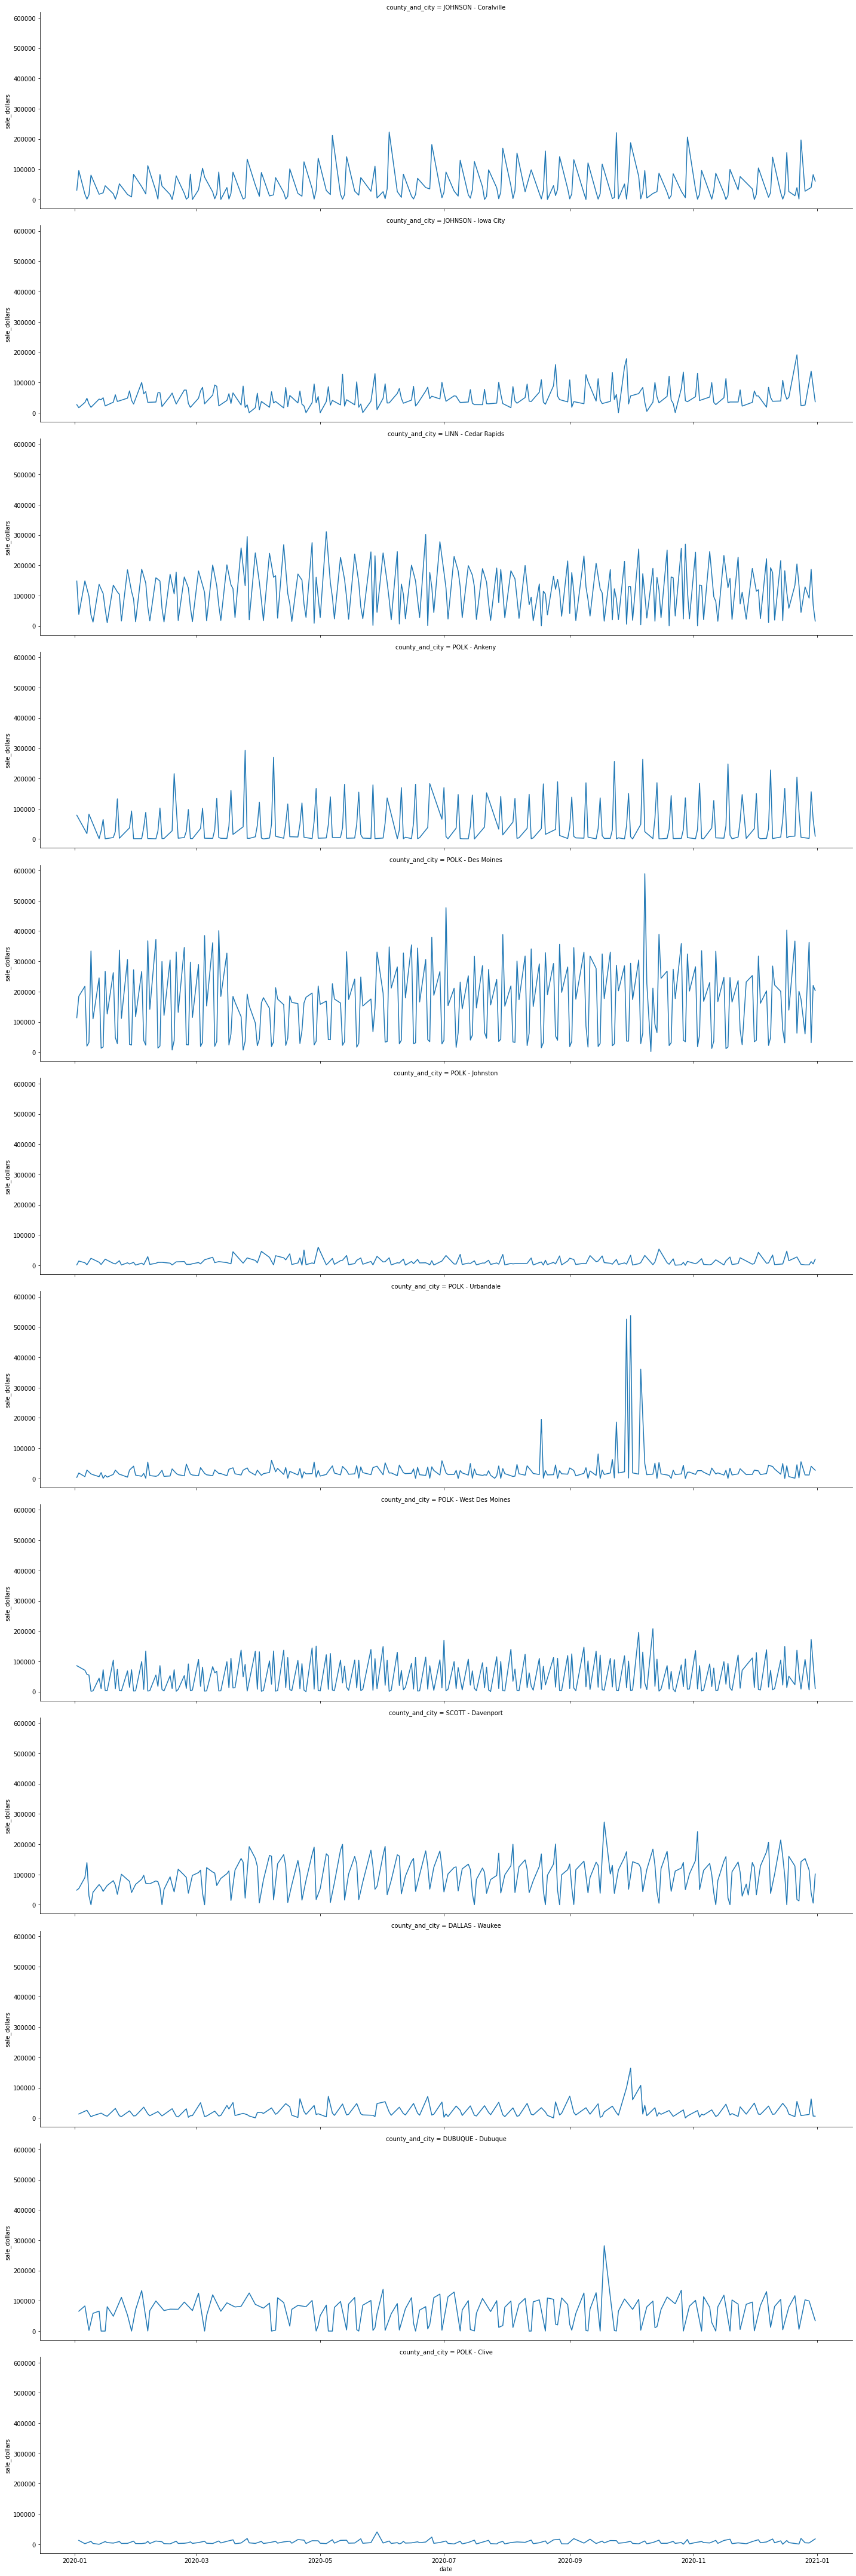

In [186]:
sns.relplot(
    data=df_filtered,
    x="date",
    y="sale_dollars",
    # hue="project_name_and_service",
    row=group,
    height=5,
    aspect=4,
    kind="line",
    # facet_kws={'sharey': False, 'sharex': True},
    errorbar=None,
)

In [187]:
df_filtered.to_csv("iowa_liquor_sales.csv", index=False)